<a href="https://colab.research.google.com/github/ycarrera01/Miner-a-de-datos/blob/main/An%C3%A1lisisIPHEestadistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
#Se cargan las librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import silhouette_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from itertools import product


In [2]:
# Cargar dataset
df = pd.read_excel("agrupado.xlsx")

In [3]:
#Comprobar que la data está cargada correctamente
df.head ()

,Fecha_Cierre,Año,Mes,Número_mes,"Escuela, Programa, Extensión",C_E_Total,C_E_Hombre,C_E_Mujer,C_E_Contactado,IPHE_Total,IPHE_Hombre,IPHE_Mujer,IPHE_Contactados,Ctd_Docentes
0,2021-01-31,2021,Enero,1,Escuela de Enseñanza Especial,1476,876,600,0,0,0,0,0,0
1,2021-01-31,2021,Enero,1,Escuela Vocacional Especial,593,374,219,0,853,543,310,0,0
2,2021-01-31,2021,Enero,1,Escuela de Sordos,1006,624,382,0,24,11,13,0,0
3,2021-01-31,2021,Enero,1,Escuela de Ciegos Hellen Keller,145,94,51,0,105,51,54,0,0
4,2021-01-31,2021,Enero,1,Programa de Autismo,281,199,82,0,76,65,11,0,0


In [4]:
# Busco conocer el tipo de datos que tiene el dataset
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Fecha_Cierre                  525 non-null    datetime64[ns]
 1   Año                           525 non-null    int64         
 2   Mes                           525 non-null    object        
 3   Número_mes                    525 non-null    int64         
 4   Escuela, Programa, Extensión  525 non-null    object        
 5    C_E_Total                    525 non-null    int64         
 6   C_E_Hombre                    525 non-null    int64         
 7   C_E_Mujer                     525 non-null    int64         
 8   C_E_Contactado                525 non-null    int64         
 9   IPHE_Total                    525 non-null    int64         
 10  IPHE_Hombre                   525 non-null    int64         
 11  IPHE_Mujer                    52

In [5]:
#Aplicar la estadistica descriptiva para entender el comportamiento de los datos
df.describe ()

,Fecha_Cierre,Año,Número_mes,C_E_Total,C_E_Hombre,C_E_Mujer,C_E_Contactado,IPHE_Total,IPHE_Hombre,IPHE_Mujer,IPHE_Contactados,Ctd_Docentes
count,525,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000
mean,2022-02-01 00:57:36,2021.560000,6.360000,536.579048,133.180952,77.767619,149.337143,226.828571,62.529524,36.598095,56.967619,10.815238
min,2021-01-31 00:00:00,2021.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2021-07-31 00:00:00,2021.000000,3.000000,250.000000,0.000000,0.000000,0.000000,96.000000,0.000000,0.000000,0.000000,0.000000
50%,2022-01-31 00:00:00,2022.000000,6.000000,373.000000,0.000000,0.000000,0.000000,162.000000,0.000000,0.000000,0.000000,0.000000
75%,2022-07-31 00:00:00,2022.000000,9.000000,837.000000,199.000000,101.000000,153.000000,284.000000,95.000000,56.000000,25.000000,0.000000
max,2023-03-31 00:00:00,2023.000000,12.000000,1528.000000,955.000000,641.000000,1431.000000,1382.000000,839.000000,543.000000,862.000000,224.000000
std,NaN,0.571859,3.454436,392.375507,223.659245,137.825033,316.069230,227.608017,126.136927,74.783073,139.498656,26.269343


In [6]:
print(df.columns.tolist())

['Fecha_Cierre', 'Año', 'Mes', 'Número_mes', 'Escuela, Programa, Extensión', ' C_E_Total', 'C_E_Hombre', 'C_E_Mujer', 'C_E_Contactado', 'IPHE_Total', 'IPHE_Hombre', 'IPHE_Mujer', 'IPHE_Contactados', 'Ctd_Docentes']


In [7]:
# Lista de columnas a evaluar se seleccionan las numéricas int64
columnas_numericas = [
    ' C_E_Total', 'C_E_Hombre', 'C_E_Mujer', 'C_E_Contactado', 'IPHE_Total', 'IPHE_Hombre', 'IPHE_Mujer', 'IPHE_Contactados', 'Ctd_Docentes'
]

# Agrupar por mes.
# y verificar si todas las columnas numéricas son cero en cada grupo
meses_validos = df.groupby("Fecha_Cierre")[columnas_numericas].sum().ne(0).any(axis=1)


In [8]:
# se crea una copia de dataframe para que se guarden los cambios
df_limpio = df.copy()

# Los datos publicados presentan incosistencias mes a mes, y es que no todos los
# meses se publicaban todos los datos de las variables de estudio.
# Con la ayuda de este código se busca que si la columna está totalmente en cero para
# ese mes se reemplace a NaN para que los resultados no se afecten
for mes, grupo in df.groupby("Fecha_Cierre"):
    for col in columnas_numericas:
        if grupo[col].sum() == 0:

            df_limpio.loc[df["Fecha_Cierre"] == mes, col] = np.nan

In [9]:
# Confirmando los resultados
df_limpio[df_limpio["Fecha_Cierre"] == "11/30/2022"][columnas_numericas]

,C_E_Total,C_E_Hombre,C_E_Mujer,C_E_Contactado,IPHE_Total,IPHE_Hombre,IPHE_Mujer,IPHE_Contactados,Ctd_Docentes
462,1396,864.0,532.0,NaN,0,0.0,0.0,NaN,NaN
463,592,412.0,180.0,NaN,897,563.0,334.0,NaN,NaN
464,1022,614.0,408.0,NaN,32,19.0,13.0,NaN,NaN
465,166,99.0,67.0,NaN,104,62.0,42.0,NaN,NaN
466,329,228.0,101.0,NaN,130,108.0,22.0,NaN,NaN
467,405,256.0,149.0,NaN,183,126.0,57.0,NaN,NaN
468,367,244.0,123.0,NaN,178,106.0,72.0,NaN,NaN
469,390,241.0,149.0,NaN,0,0.0,0.0,NaN,NaN
470,229,141.0,88.0,NaN,198,123.0,75.0,NaN,NaN
471,147,99.0,48.0,NaN,160,103.0,57.0,NaN,NaN


In [10]:
# Quisiera eliminar unas columnas innecesarias ya que de ellas se indica la Fecha_Cierre
columnas_a_eliminar = ['Año', 'Mes', 'Número_mes']

df_limpio = df_limpio.drop(columns=[col for col in columnas_a_eliminar if col in df_limpio.columns])

In [11]:
# La data que fue publicada mes a mes presentaba variaciones, sin embargo uno de los
# datos que no varió era los totales reportados, mí intención rellenar los campos
# con la proporción más real entre hombres y mujeres pero que la suma de ambos sea el total
# Cálculo de proporciones promedio reales.
df_validos_ce = df_limpio.dropna(subset=['C_E_Hombre', 'C_E_Mujer', ' C_E_Total'])
df_validos_iphe = df_limpio.dropna(subset=['IPHE_Hombre', 'IPHE_Mujer', 'IPHE_Total'])

# Proporción promedio de hombres y mujeres
p_ce_hombre = (df_validos_ce['C_E_Hombre'] / df_validos_ce[' C_E_Total']).mean()
p_ce_mujer = 1 - p_ce_hombre

p_iphe_hombre = (df_validos_iphe['IPHE_Hombre'] / df_validos_iphe['IPHE_Total']).mean()
p_iphe_mujer = 1 - p_iphe_hombre

In [12]:
# Imputar C_E_Hombre y C_E_Mujer si falta alguno
df_limpio['C_E_Hombre'] = df_limpio.apply(
    lambda row: p_ce_hombre * row[' C_E_Total'] if pd.isna(row['C_E_Hombre']) else row['C_E_Hombre'],
    axis=1
)

df_limpio['C_E_Mujer'] = df_limpio.apply(
    lambda row: p_ce_mujer * row[' C_E_Total'] if pd.isna(row['C_E_Mujer']) else row['C_E_Mujer'],
    axis=1
)

# Imputar IPHE_Hombre y IPHE_Mujer si falta alguno
df_limpio['IPHE_Hombre'] = df_limpio.apply(
    lambda row: p_iphe_hombre * row['IPHE_Total'] if pd.isna(row['IPHE_Hombre']) else row['IPHE_Hombre'],
    axis=1
)

df_limpio['IPHE_Mujer'] = df_limpio.apply(
    lambda row: p_iphe_mujer * row['IPHE_Total'] if pd.isna(row['IPHE_Mujer']) else row['IPHE_Mujer'],
    axis=1
)

In [13]:
 df_limpio.info ()  ## Evaluando al data set limpio

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Fecha_Cierre                  525 non-null    datetime64[ns]
 1   Escuela, Programa, Extensión  525 non-null    object        
 2    C_E_Total                    525 non-null    int64         
 3   C_E_Hombre                    525 non-null    float64       
 4   C_E_Mujer                     525 non-null    float64       
 5   C_E_Contactado                147 non-null    float64       
 6   IPHE_Total                    525 non-null    int64         
 7   IPHE_Hombre                   525 non-null    float64       
 8   IPHE_Mujer                    525 non-null    float64       
 9   IPHE_Contactados              147 non-null    float64       
 10  Ctd_Docentes                  105 non-null    float64       
dtypes: datetime64[ns](1), float64(7)

In [14]:
df_limpio.describe ()

,Fecha_Cierre,C_E_Total,C_E_Hombre,C_E_Mujer,C_E_Contactado,IPHE_Total,IPHE_Hombre,IPHE_Mujer,IPHE_Contactados,Ctd_Docentes
count,525,525.000000,525.000000,525.000000,147.000000,525.000000,525.000000,525.000000,147.000000,105.000000
mean,2022-02-01 00:57:36,536.579048,340.727320,195.851727,533.346939,226.828571,142.093202,84.923941,203.455782,54.076190
min,2021-01-31 00:00:00,0.000000,0.000000,0.000000,104.000000,0.000000,0.000000,0.000000,0.000000,8.000000
25%,2021-07-31 00:00:00,250.000000,159.341941,91.020692,250.000000,96.000000,58.480050,34.008463,90.000000,31.000000
50%,2022-01-31 00:00:00,373.000000,240.000000,134.000000,376.000000,162.000000,103.000000,61.215234,153.000000,40.000000
75%,2022-07-31 00:00:00,837.000000,533.476817,303.523183,841.000000,284.000000,179.000000,100.000000,270.000000,80.000000
max,2023-03-31 00:00:00,1528.000000,955.000000,641.000000,1431.000000,1382.000000,839.000000,543.000000,862.000000,224.000000
std,NaN,392.375507,246.125243,148.122934,390.296141,227.608017,142.442851,85.685090,199.585297,33.392392


In [15]:
# Extraer el año y el mes
df['Año'] = df['Fecha_Cierre'].dt.year
df['Mes'] = df['Fecha_Cierre'].dt.month

# Agrupar los datos por Año, Mes y Programa
df_grouped = df.groupby(['Año', 'Mes', 'Escuela, Programa, Extensión'], as_index=False).agg({
    ' C_E_Total': 'sum',
    'C_E_Hombre': 'sum',
    'C_E_Mujer': 'sum',
    'IPHE_Total': 'sum',
    'IPHE_Hombre': 'sum',
    'IPHE_Mujer': 'sum'
})

# Ver los datos agrupados para asegurarnos que todo esté en orden
print(df_grouped.head())

    Año  Mes     Escuela, Programa, Extensión   C_E_Total  C_E_Hombre  \
0  2021    1      Escuela Vocacional Especial         593         374   
1  2021    1  Escuela de Ciegos Hellen Keller         145          94   
2  2021    1    Escuela de Enseñanza Especial        1476         876   
3  2021    1                Escuela de Sordos        1006         624   
4  2021    1           Extensión de Aguadulce         241         146   

   C_E_Mujer  IPHE_Total  IPHE_Hombre  IPHE_Mujer  
0        219         853          543         310  
1         51         105           51          54  
2        600           0            0           0  
3        382          24           11          13  
4         95         147           91          56  


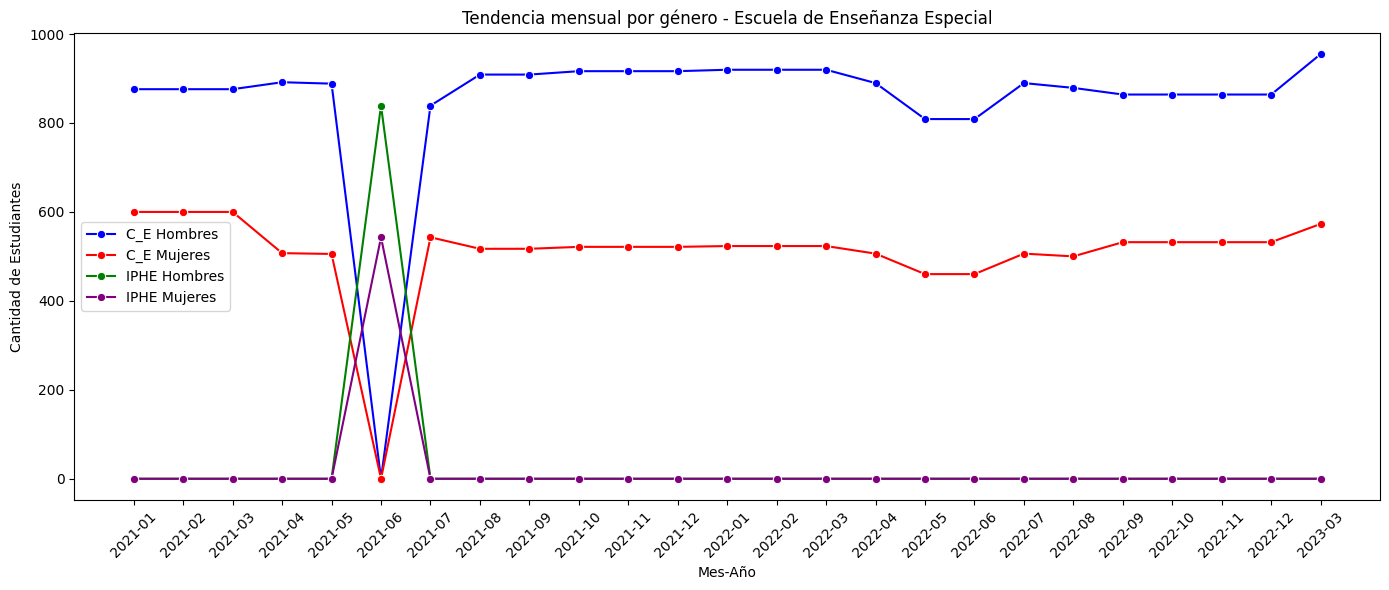

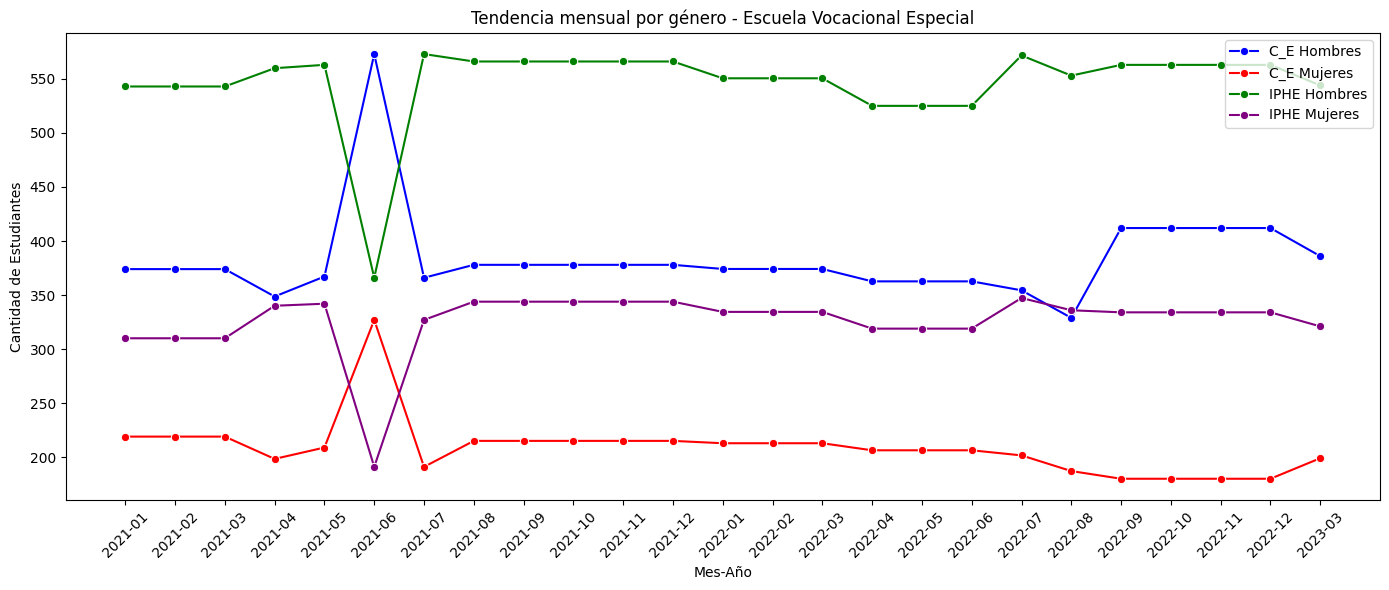

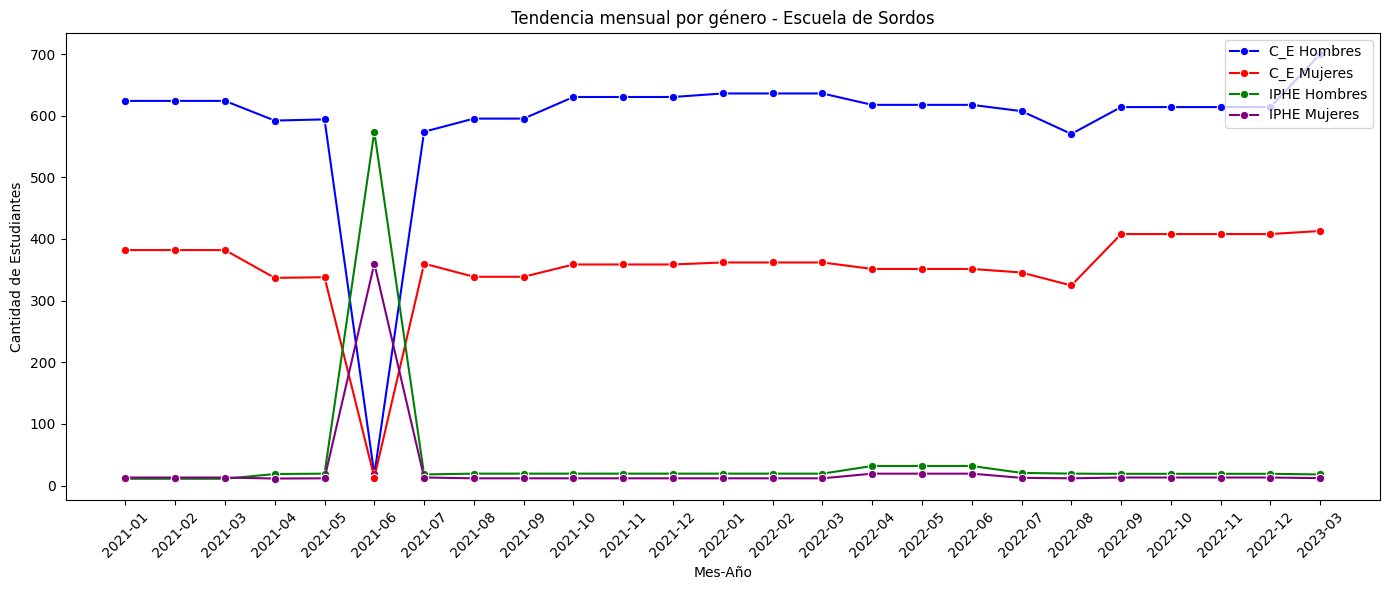

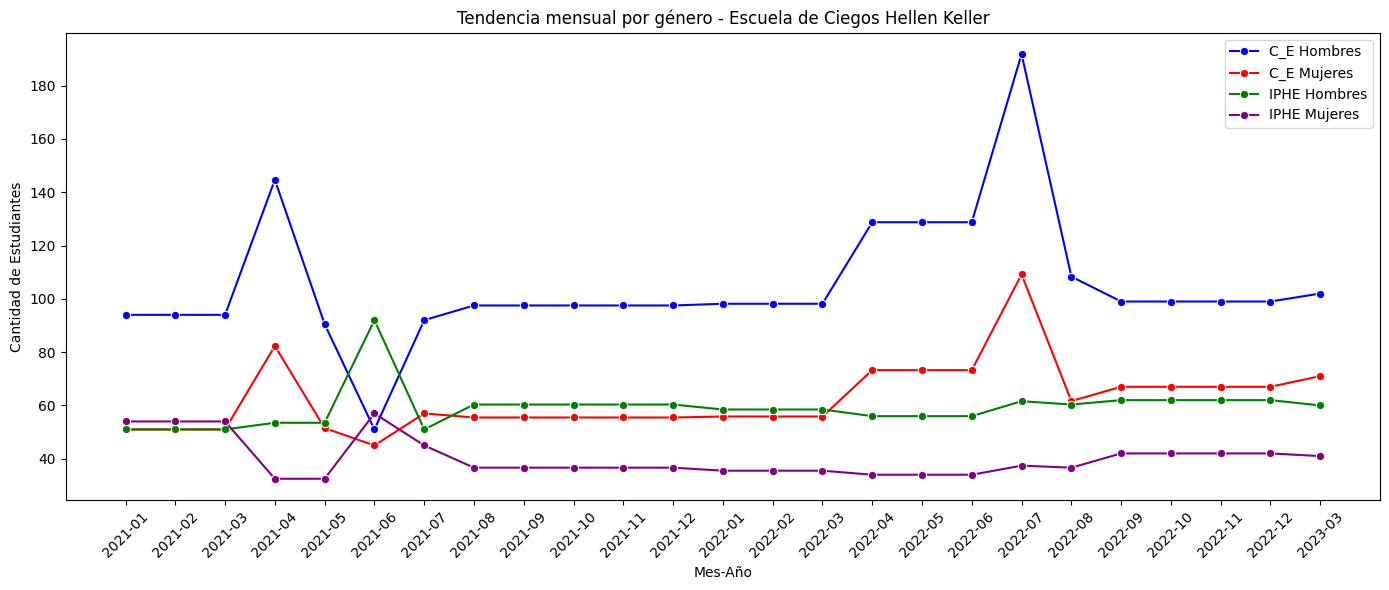

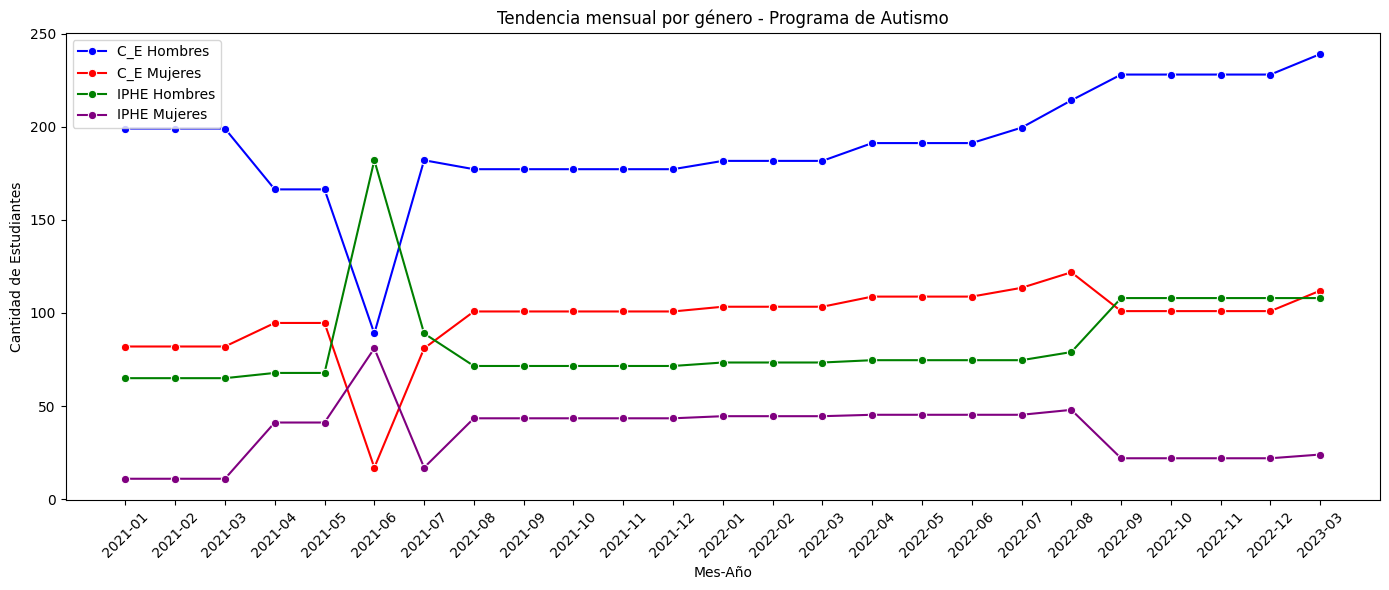

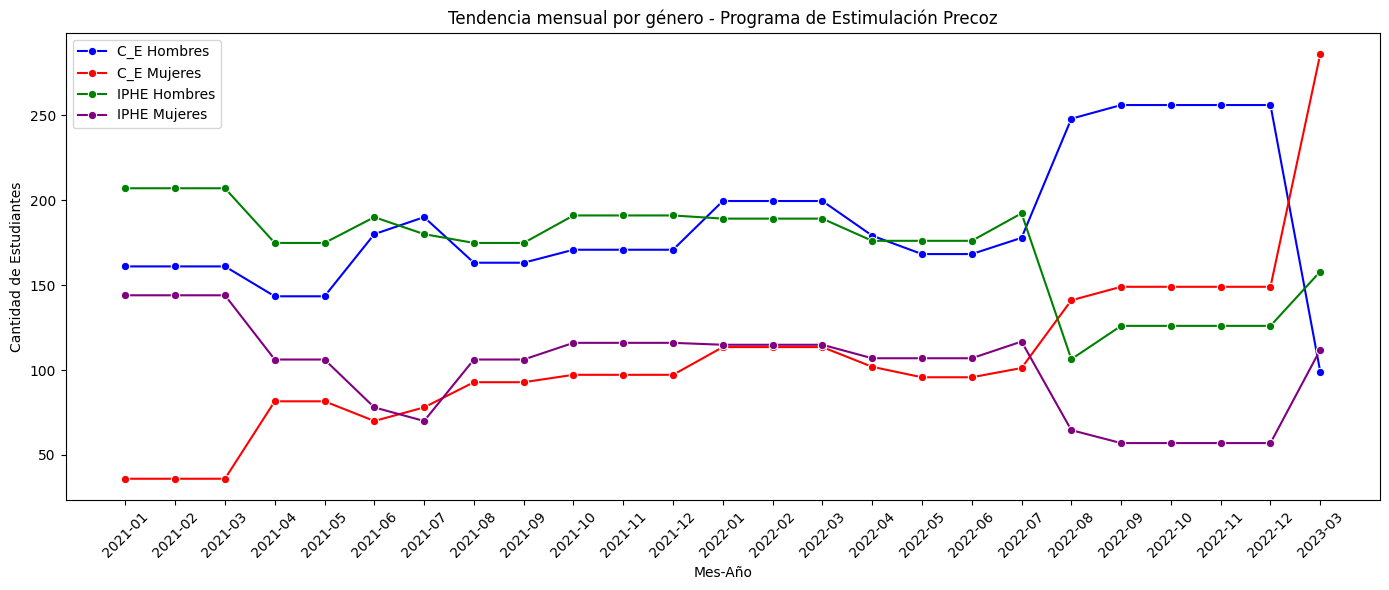

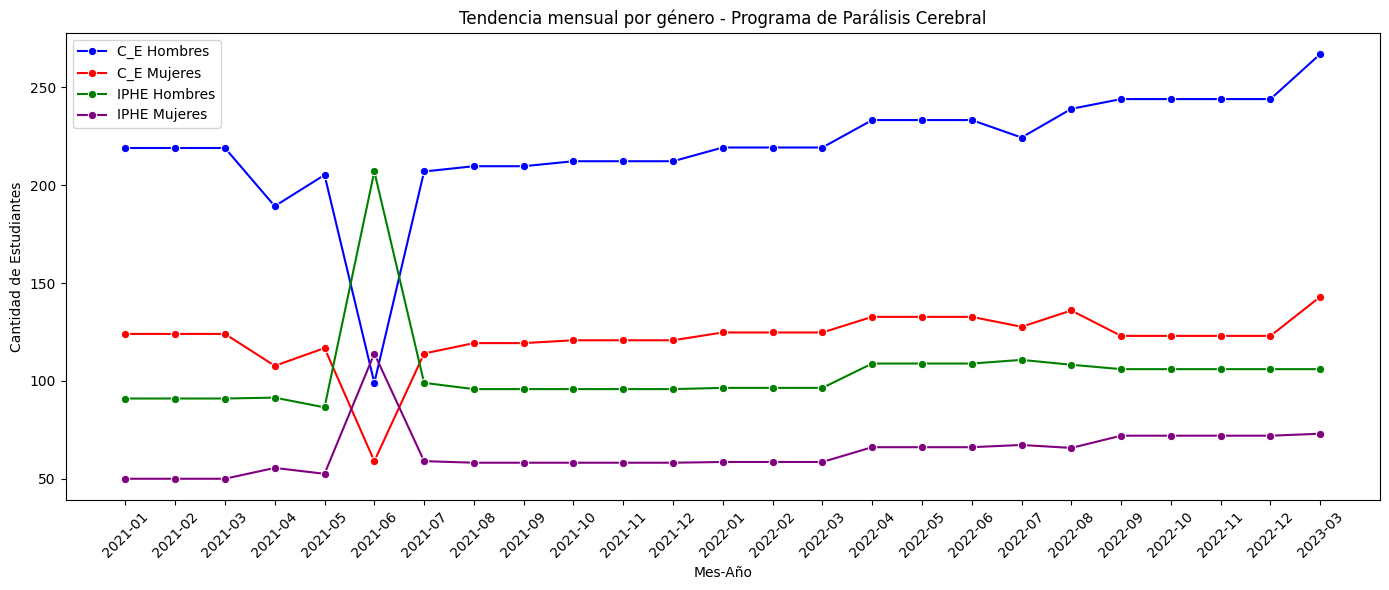

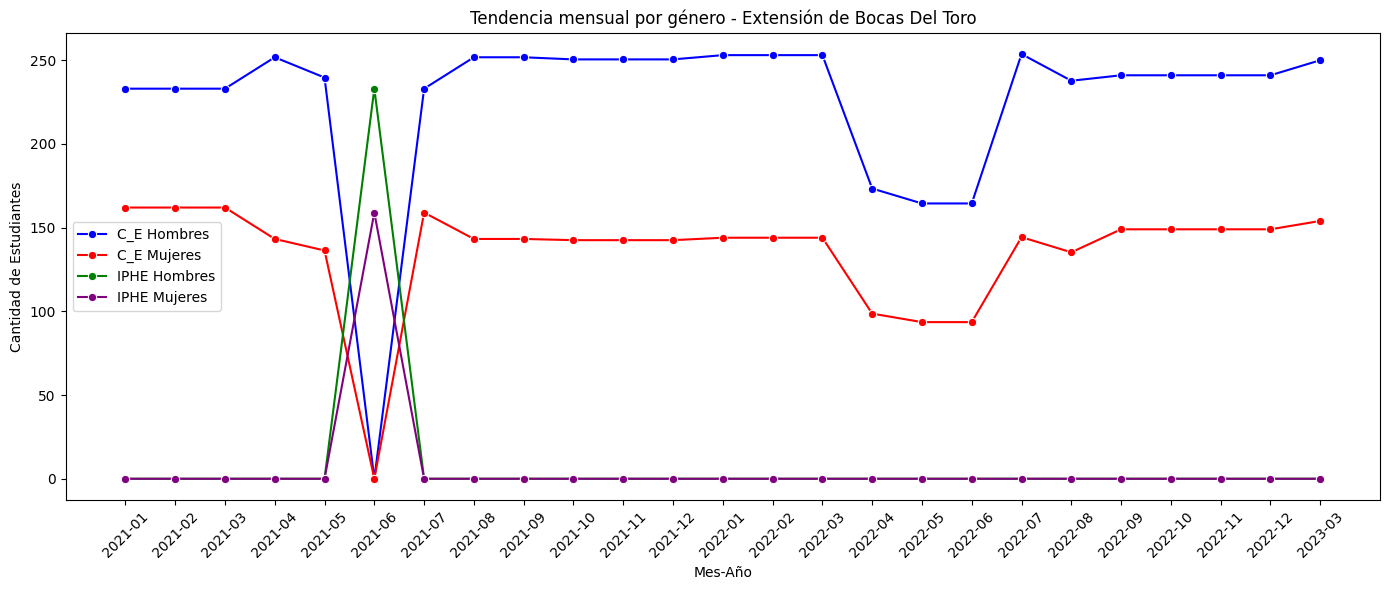

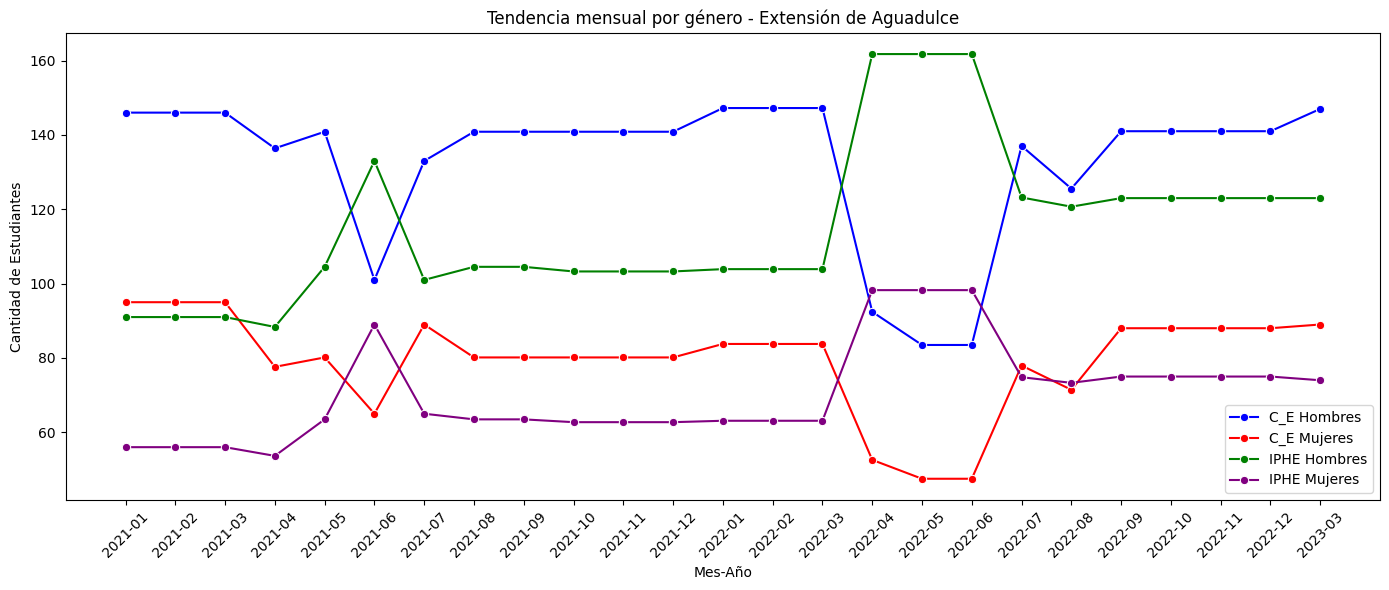

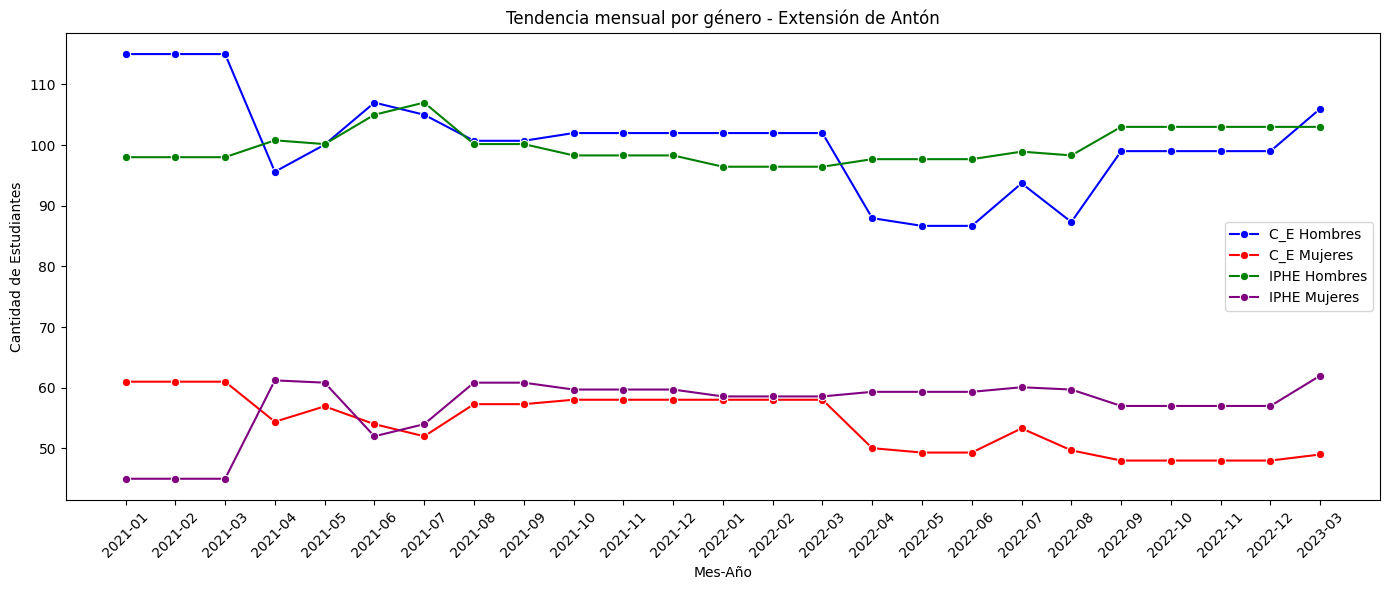

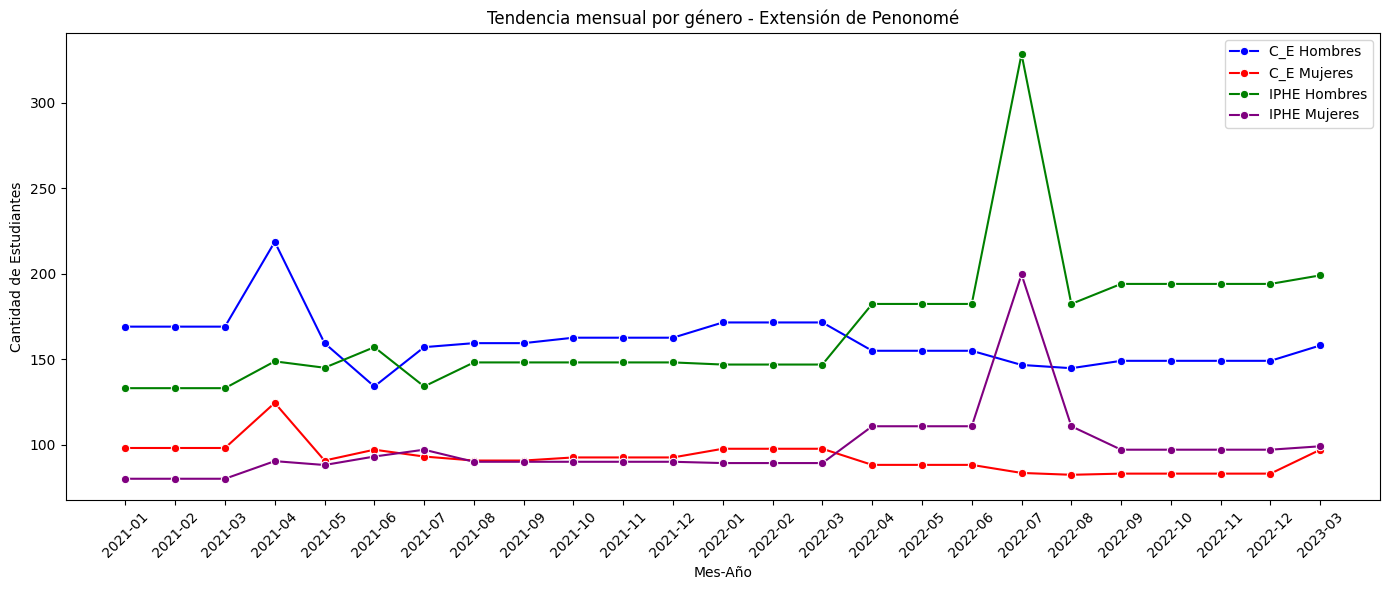

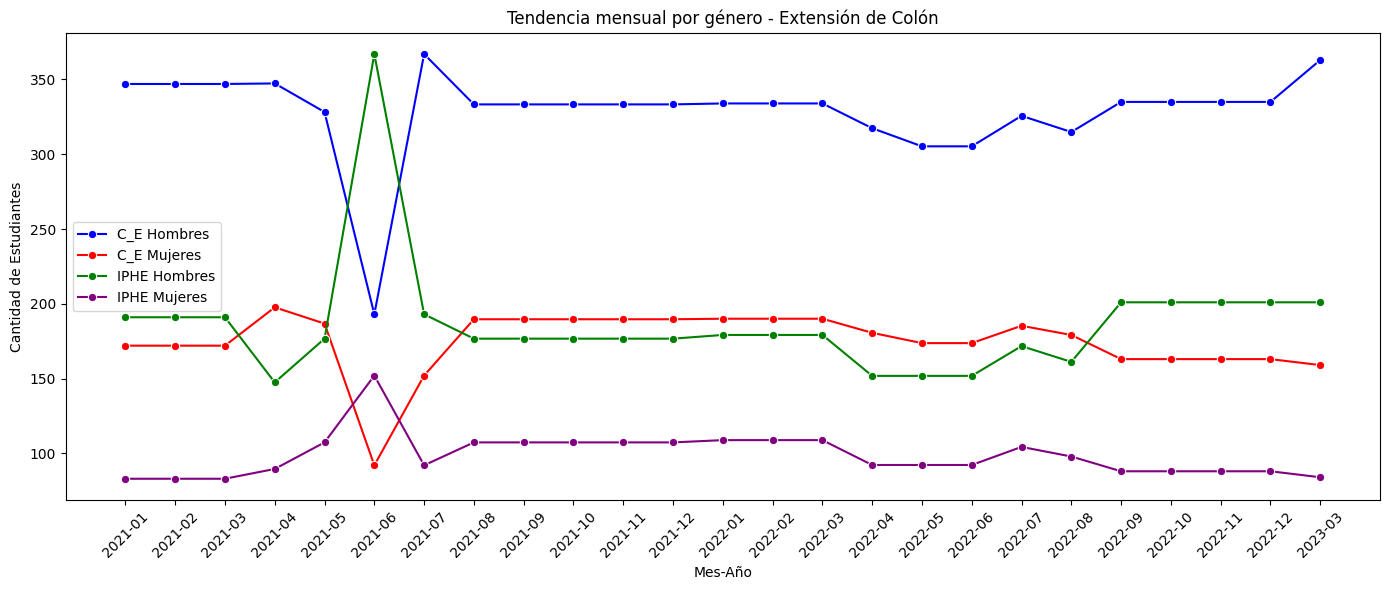

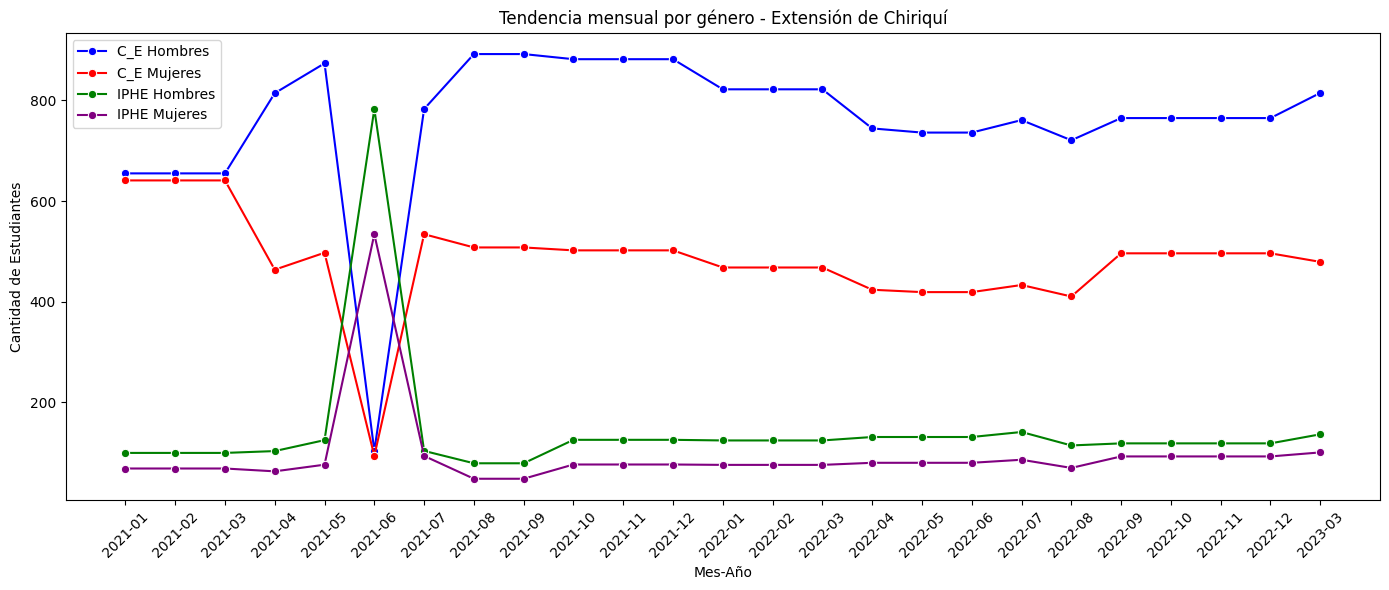

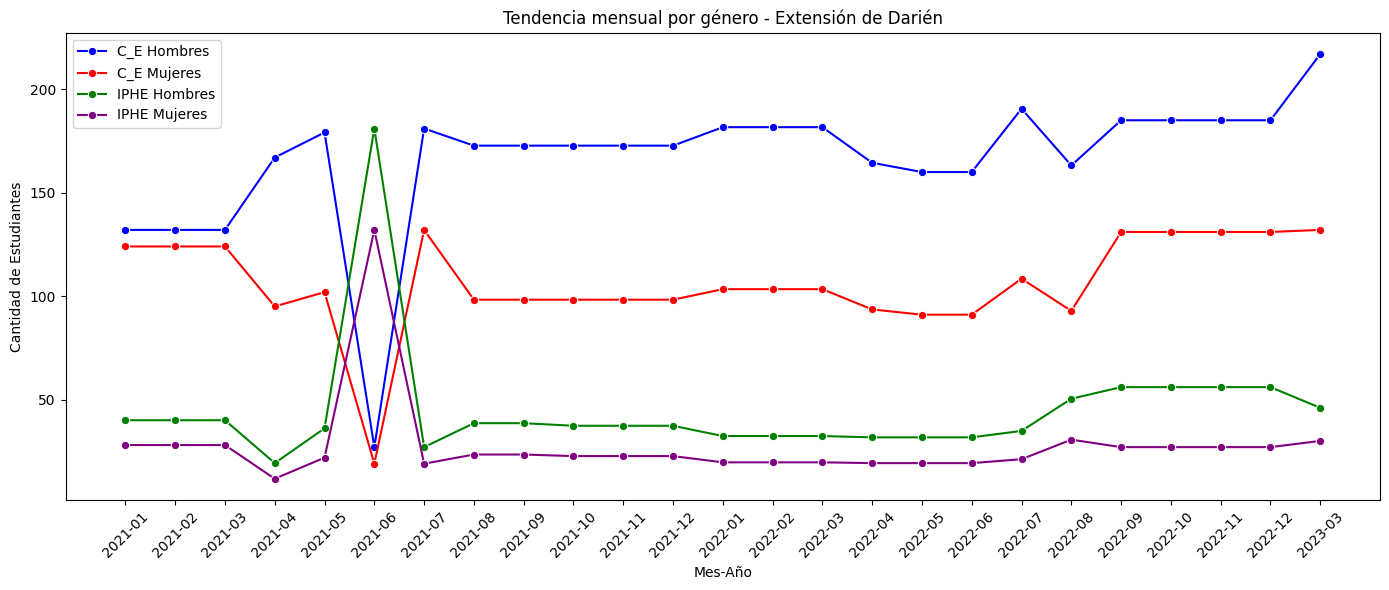

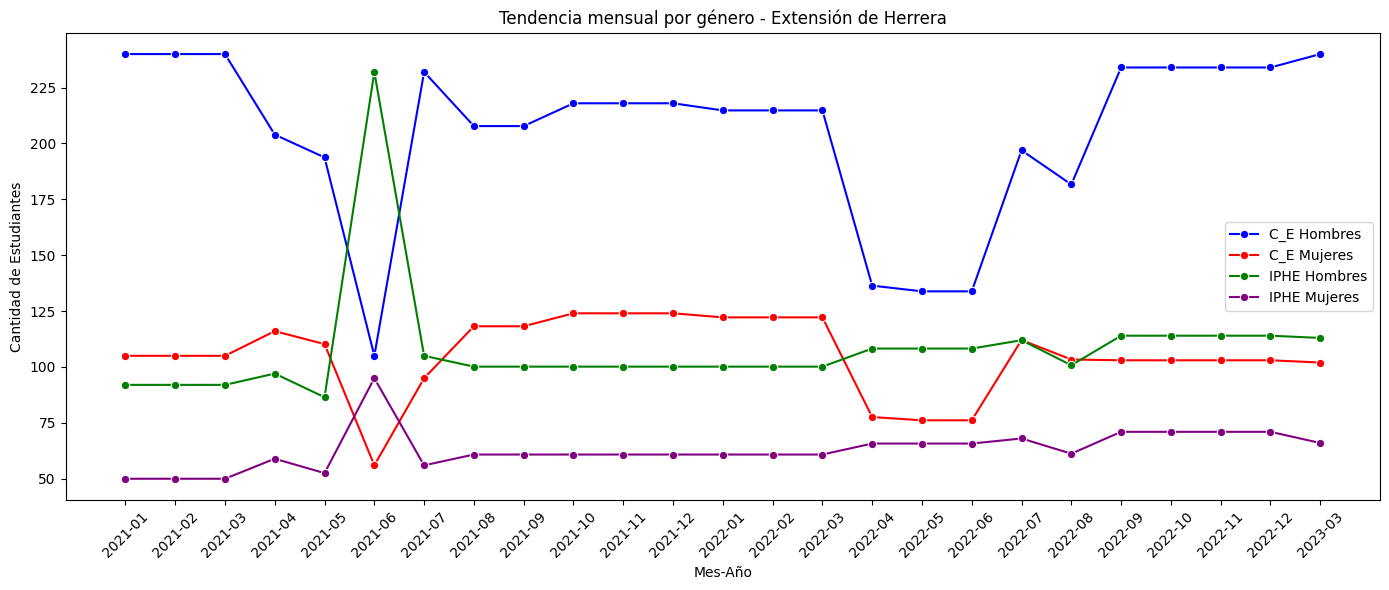

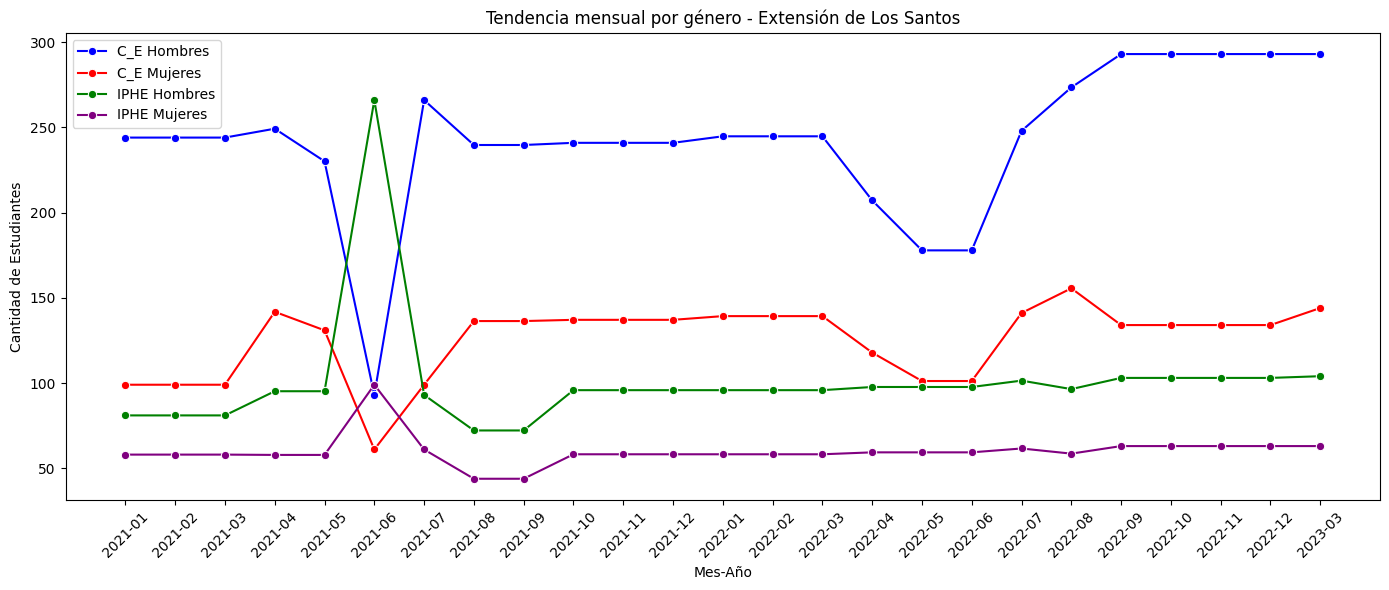

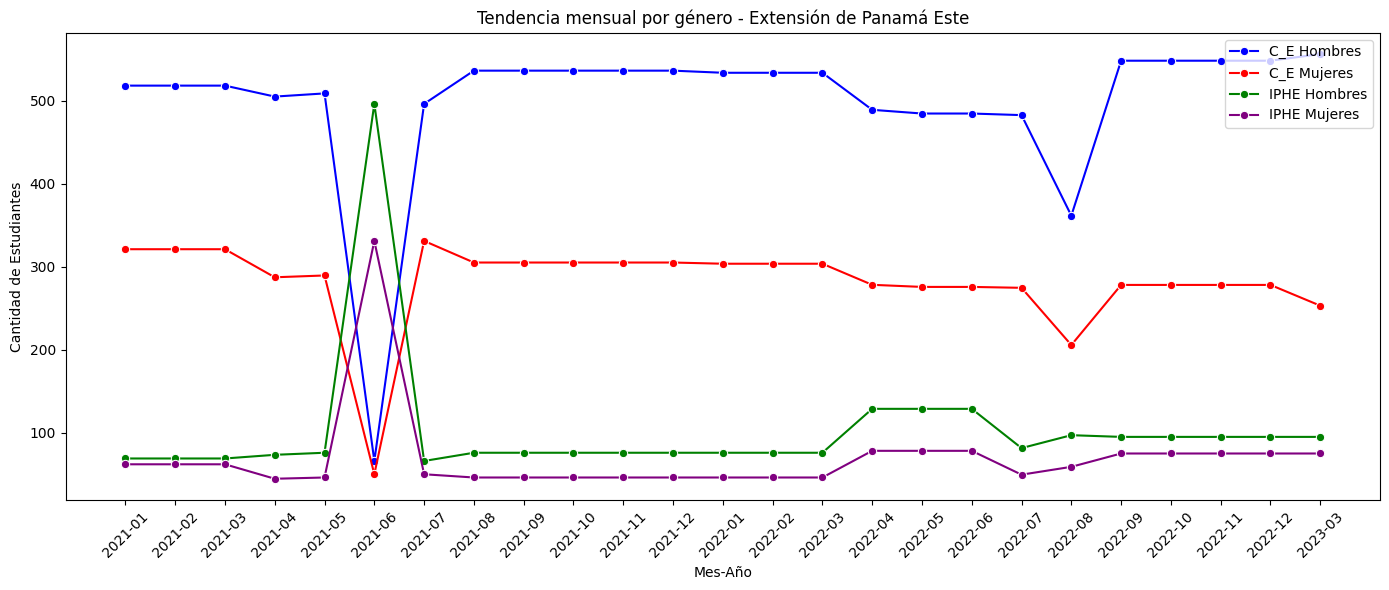

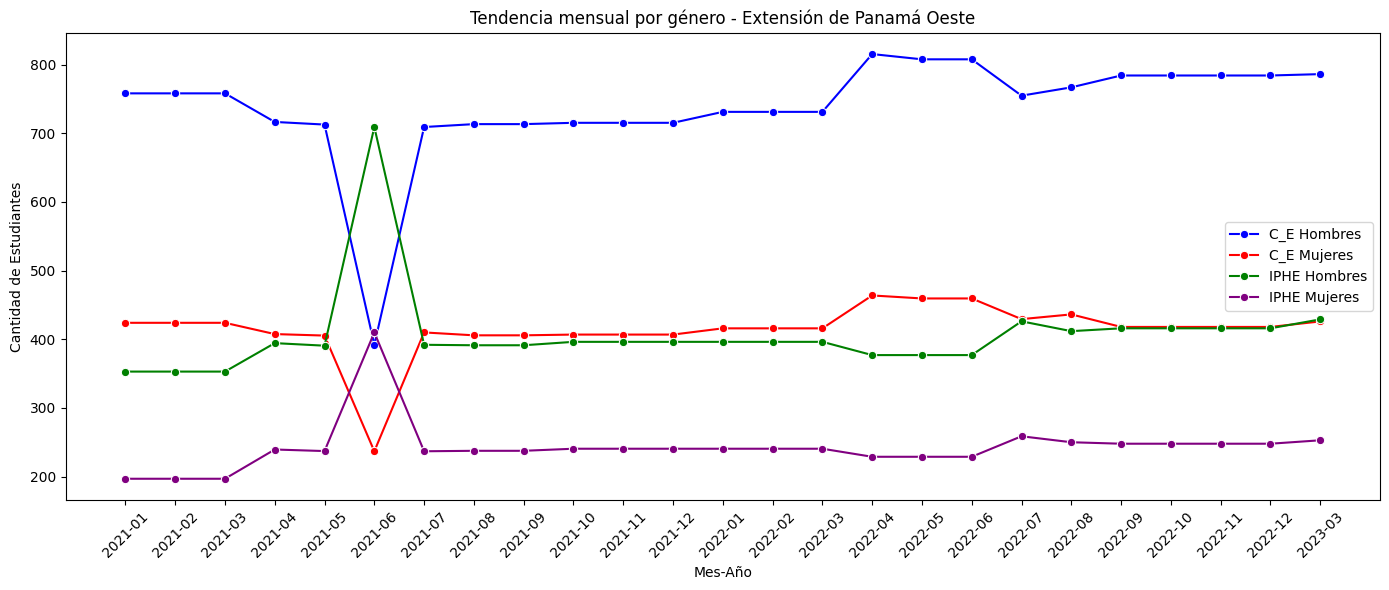

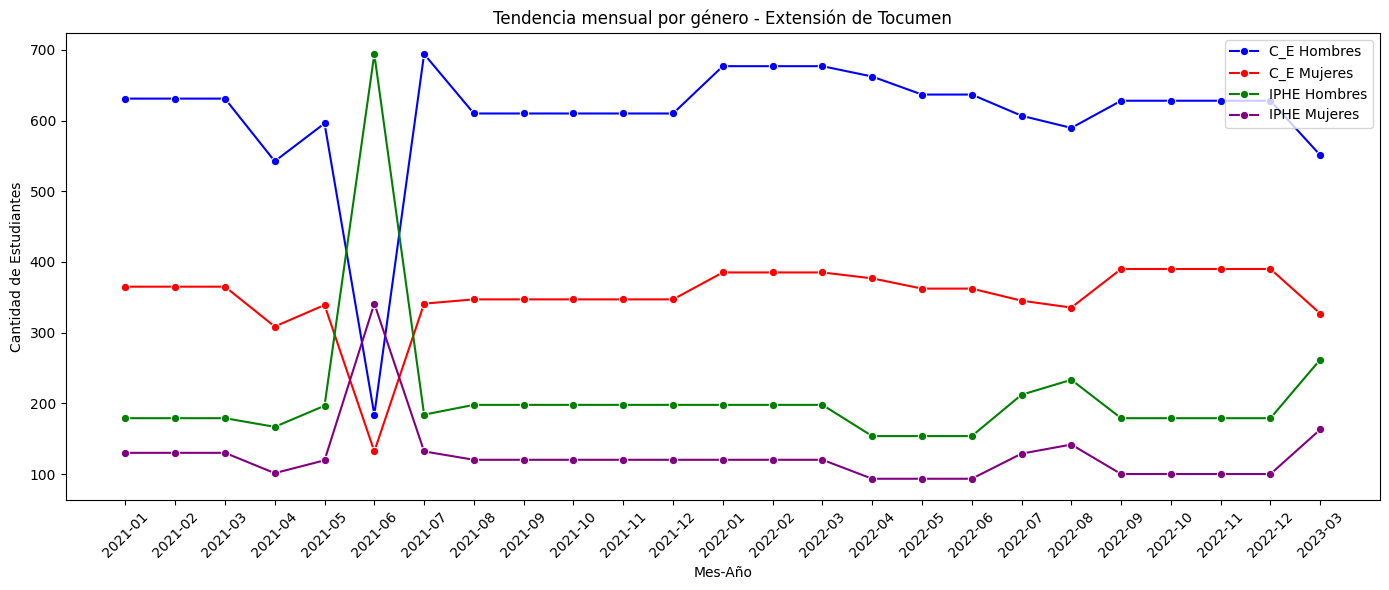

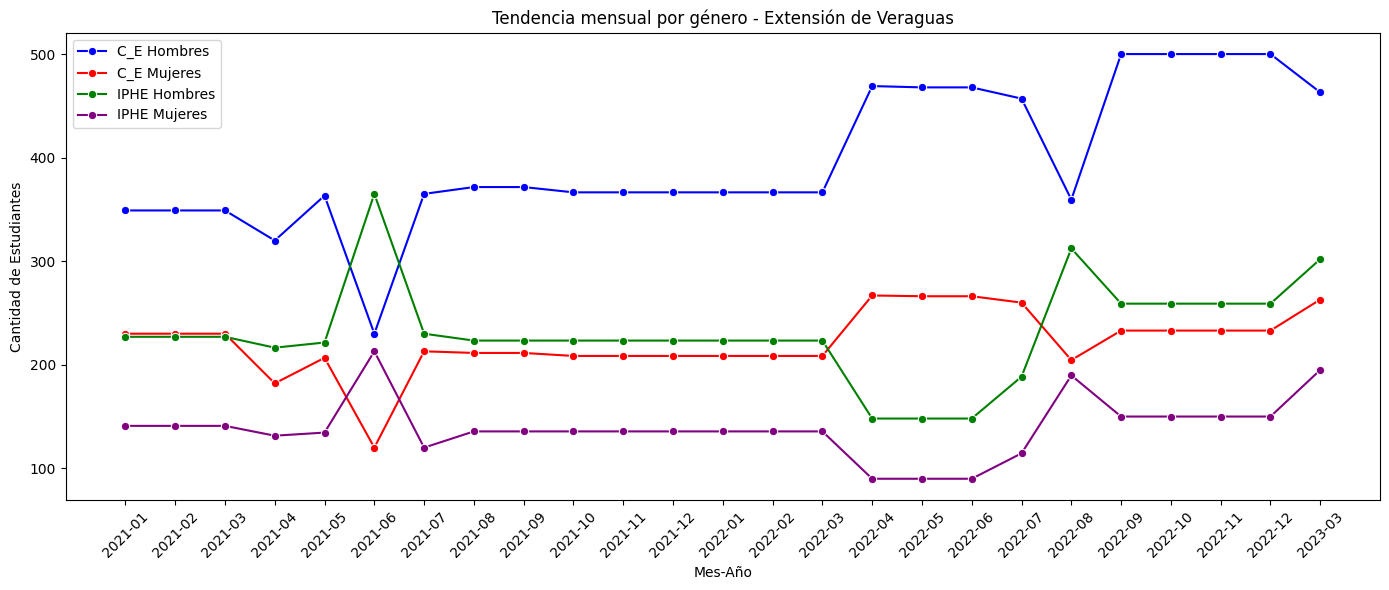

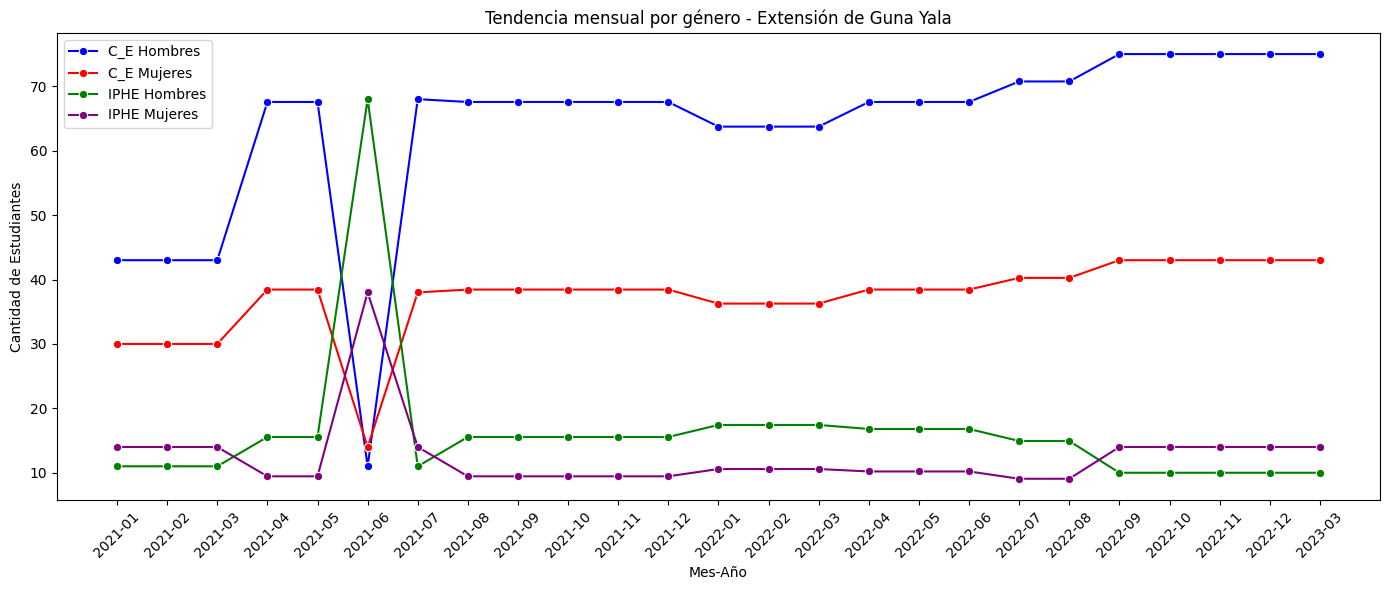

In [16]:
# Confirmando tener datetime y columnas limpias
df_limpio['Fecha_Cierre'] = pd.to_datetime(df_limpio['Fecha_Cierre'], format='%m/%d/%Y')
df_limpio['Año'] = df_limpio['Fecha_Cierre'].dt.year
df_limpio['Mes'] = df_limpio['Fecha_Cierre'].dt.month
df_limpio['MesAño'] = df_limpio['Fecha_Cierre'].dt.to_period('M').astype(str)

# Limpiar nombres de columnas por si tienen espacios
df_limpio.columns = df_limpio.columns.str.strip()

# Lista de programas a graficar
programas = [
    'Escuela de Enseñanza Especial', 'Escuela Vocacional Especial', 'Escuela de Sordos',
    'Escuela de Ciegos Hellen Keller', 'Programa de Autismo', 'Programa de Estimulación Precoz',
    'Programa de Parálisis Cerebral', 'Extensión de Bocas Del Toro', 'Extensión de Aguadulce',
    'Extensión de Antón', 'Extensión de Penonomé', 'Extensión de Colón', 'Extensión de Chiriquí',
    'Extensión de Darién', 'Extensión de Herrera', 'Extensión de Los Santos', 'Extensión de Panamá Este',
    'Extensión de Panamá Oeste', 'Extensión de Tocumen', 'Extensión de Veraguas', 'Extensión de Guna Yala'
]

# Generar gráfico por programa
for programa in programas:
    df_prog = df_limpio[df_limpio['Escuela, Programa, Extensión'] == programa].copy()

    if df_prog.empty:
        continue  # Saltar si no hay datos

    plt.figure(figsize=(14, 6))

    # Graficar líneas de C_E
    sns.lineplot(data=df_prog, x='MesAño', y='C_E_Hombre', label='C_E Hombres', marker='o', color='blue')
    sns.lineplot(data=df_prog, x='MesAño', y='C_E_Mujer', label='C_E Mujeres', marker='o', color='red')

    # Graficar líneas de IPHE
    sns.lineplot(data=df_prog, x='MesAño', y='IPHE_Hombre', label='IPHE Hombres', marker='o', color='green')
    sns.lineplot(data=df_prog, x='MesAño', y='IPHE_Mujer', label='IPHE Mujeres', marker='o', color='purple')

    plt.title(f'Tendencia mensual por género - {programa}')
    plt.xlabel('Mes-Año')
    plt.ylabel('Cantidad de Estudiantes')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

,C_E_Total,C_E_Hombre,C_E_Mujer,C_E_Contactado,IPHE_Total,IPHE_Hombre,IPHE_Mujer,IPHE_Contactados,Ctd_Docentes,Año,Mes
C_E_Total,1.000000,0.997146,0.992100,0.998807,0.108235,0.102337,0.115807,0.166477,0.713694,0.048536,0.010891
C_E_Hombre,0.997146,1.000000,0.979797,0.998807,0.120262,0.115092,0.126489,0.166477,0.713694,0.054845,0.019792
C_E_Mujer,0.992100,0.979797,1.000000,0.998807,0.086881,0.079847,0.096593,0.166477,0.713694,0.037440,-0.004036
C_E_Contactado,0.998807,0.998807,0.998807,1.000000,0.141621,0.141621,0.141621,0.157774,nan,nan,0.028772
IPHE_Total,0.108235,0.120262,0.086881,0.141621,1.000000,0.998421,0.996278,0.995725,0.483244,-0.029465,0.009062
IPHE_Hombre,0.102337,0.115092,0.079847,0.141621,0.998421,1.000000,0.990628,0.995725,0.483244,-0.026490,0.011584
IPHE_Mujer,0.115807,0.126489,0.096593,0.141621,0.996278,0.990628,1.000000,0.995725,0.483244,-0.028679,0.002668
IPHE_Contactados,0.166477,0.166477,0.166477,0.157774,0.995725,0.995725,0.995725,1.000000,nan,nan,0.016585
Ctd_Docentes,0.713694,0.713694,0.713694,nan,0.483244,0.483244,0.483244,nan,1.000000,nan,0.053902
Año,0.048536,0.054845,0.037440,nan,-0.029465,-0.026490,-0.028679,nan,nan,1.000000,-0.102247


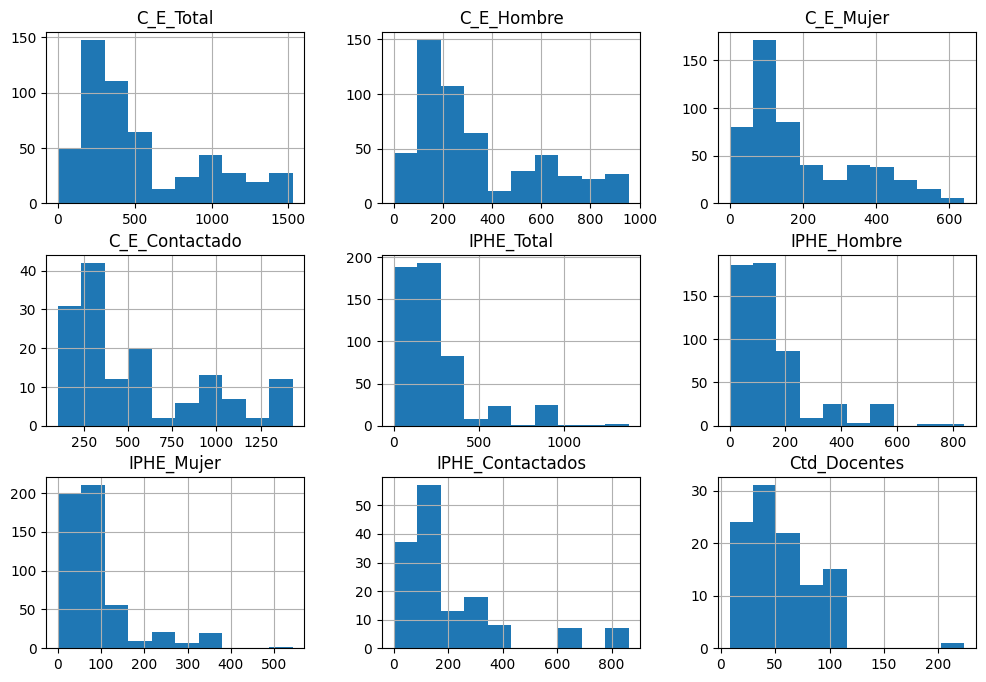

In [17]:
# Lista de columnas a evaluar se seleccionan las numéricas int64
columnas_numericas = [
    'C_E_Total', 'C_E_Hombre', 'C_E_Mujer', 'C_E_Contactado', 'IPHE_Total', 'IPHE_Hombre', 'IPHE_Mujer', 'IPHE_Contactados', 'Ctd_Docentes'
]

df_limpio[columnas_numericas].hist(figsize=(12,8))
df_limpio.corr(numeric_only=True).style.background_gradient()

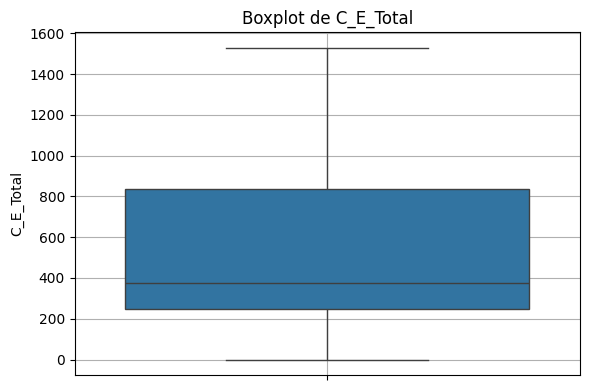

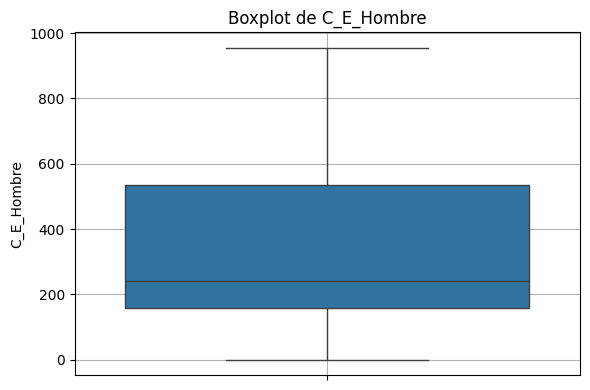

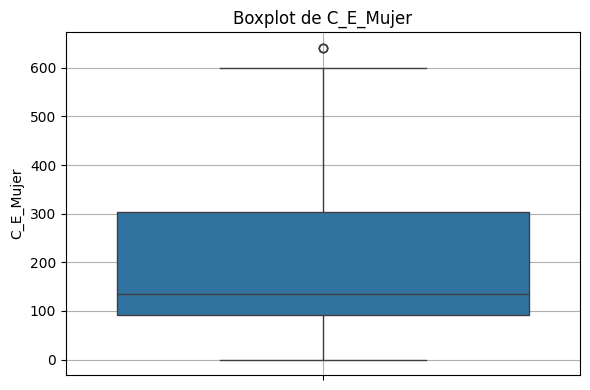

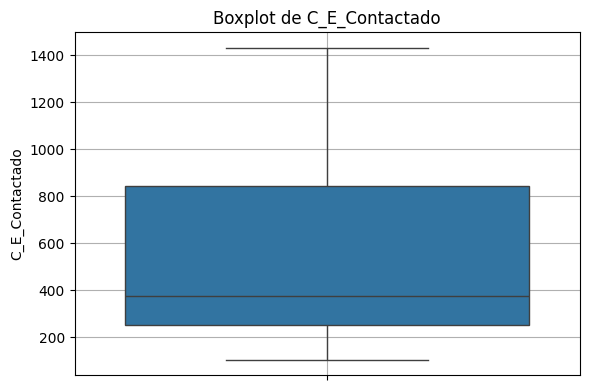

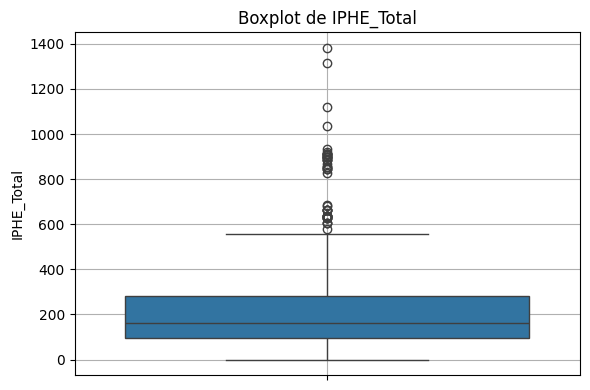

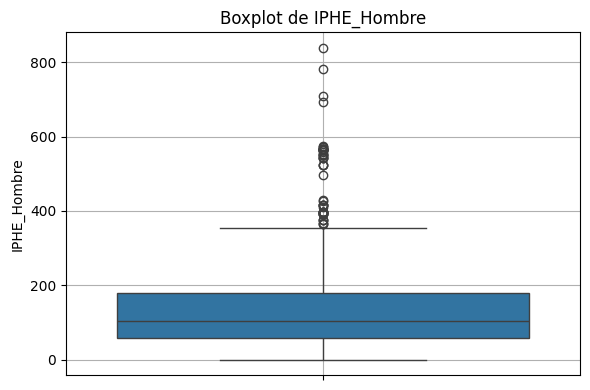

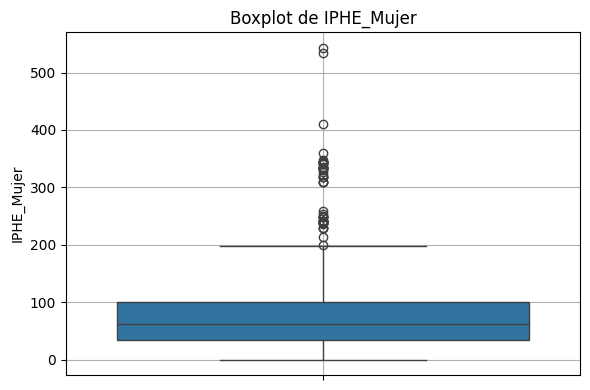

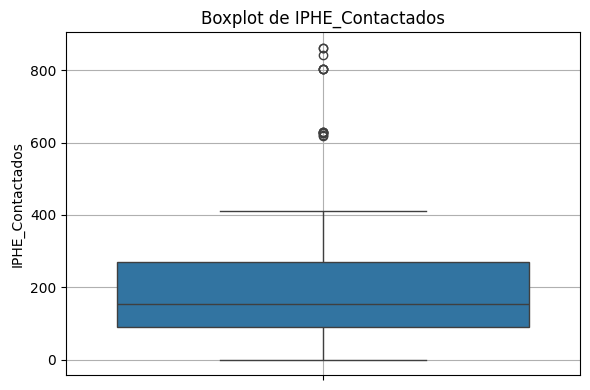

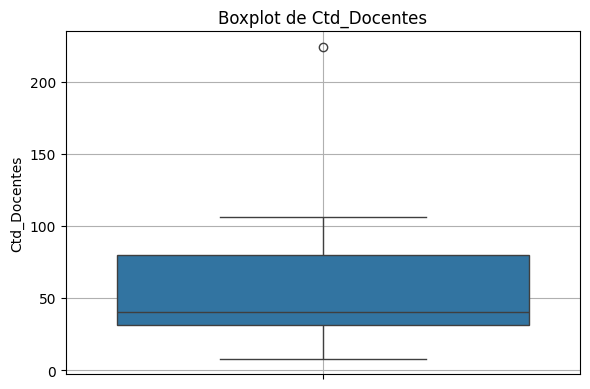

In [18]:
# Indentificar existencia de valores atípicos

# Eliminar espacios en nombres de columnas (por si acaso)
df_limpio.columns = df_limpio.columns.str.strip()

# Lista de columnas que quieres graficar
columnas = ['C_E_Total', 'C_E_Hombre', 'C_E_Mujer', 'C_E_Contactado',
            'IPHE_Total', 'IPHE_Hombre', 'IPHE_Mujer', 'IPHE_Contactados',
            'Ctd_Docentes']

# Crear un boxplot por cada columna
for col in columnas:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df_limpio[col])
    plt.title(f'Boxplot de {col}')
    plt.ylabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [19]:
df_limpio.to_excel('df_limpio.xlsx', index=False)

Ya he realizado todos los ajustes a el dataset, luego de tener finalmente mí df_limpio quiero aplicar como técnica de minería de datos al Clustering

In [47]:
# Estas son las columnas seleccionadas para el análisis, que por calidad de datos
# He decidido aplicarlo a las siguiente columnas
columnas_cluster = [
    'C_E_Total', 'C_E_Hombre', 'C_E_Mujer',
    'IPHE_Total', 'IPHE_Hombre', 'IPHE_Mujer'
]

In [48]:
# Para aplicar K means debemos escalar los datos
X = df_limpio[columnas_cluster]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

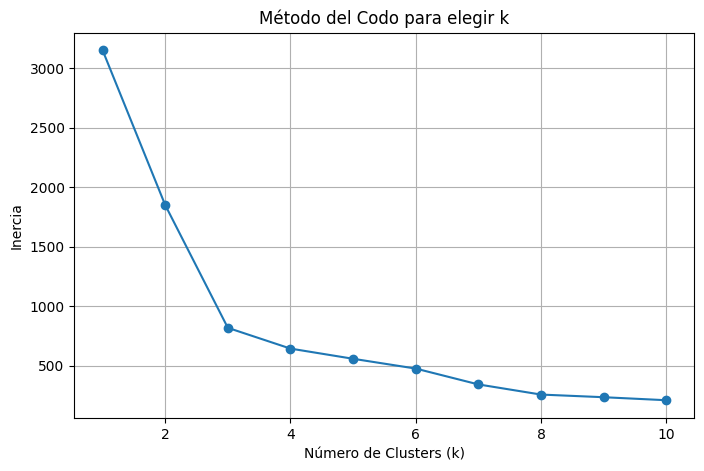

In [49]:
# Con Elbow Method la intención es definir la k optima
# Prueba varios valores de k
inercia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inercia.append(kmeans.inertia_)

# Gráfico del Codo
plt.figure(figsize=(8, 5))
plt.plot(K, inercia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para elegir k')
plt.grid(True)
plt.show()

El "codo" en la curva (el punto donde la pendiente deja de bajar rápido), Ese es el k óptimo. Para mí caso utilizaré k = 3


In [50]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X_scaled)

In [51]:
# Agrego los cluster en mí df_limpio
df_limpio['Cluster'] = labels

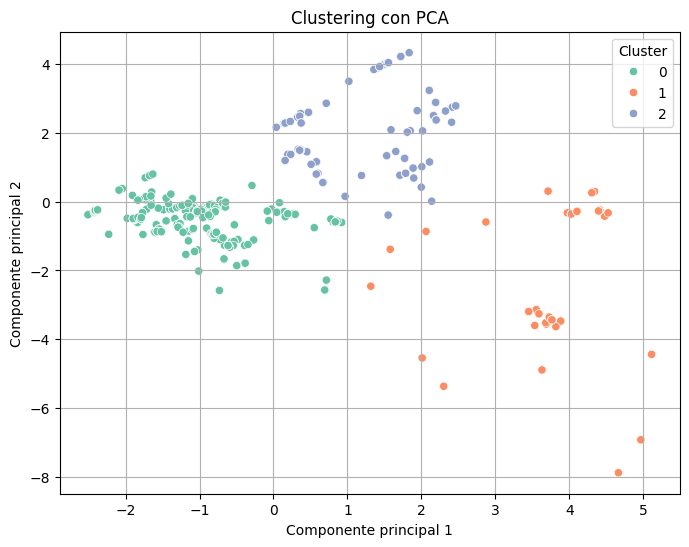

In [57]:
X_pca = PCA(n_components=2).fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='Set2')
plt.title('Clustering con PCA')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [26]:
# cómo evaluación final a este método quería conocer la calidad
sil_score = silhouette_score(X_scaled, labels)
print(f'Silhouette Score: {sil_score:.3f}')

Silhouette Score: 0.606


Resultado obtenido me indica que es un buen clustering

In [27]:
# Visualización por cluster
df_limpio.groupby('Cluster')[columnas_cluster].mean()

,C_E_Total,C_E_Hombre,C_E_Mujer,IPHE_Total,IPHE_Hombre,IPHE_Mujer
Cluster,,,,,,
0,291.614706,186.910578,104.704128,162.311765,102.785560,59.817381
1,791.672414,507.936802,283.735611,778.172414,486.246420,291.925994
2,1075.889764,676.156790,399.732974,147.755906,90.153921,57.601985


In [58]:
# Mostrar los centros agrupados por cluster
programas_por_cluster = df_limpio.groupby('Cluster')['Escuela, Programa, Extensión'].unique()

# Mostrar la lista
for cluster, programas in programas_por_cluster.items():
    print(f"\n🔹 Cluster {cluster}:")
    for programa in programas:
        print(f"  - {programa}")




🔹 Cluster 0:
  - Escuela de Ciegos Hellen Keller
  - Programa de Autismo
  - Programa de Estimulación Precoz
  - Programa de Parálisis Cerebral
  - Extensión de Bocas Del Toro
  - Extensión de Aguadulce
  - Extensión de Antón
  - Extensión de Penonomé
  - Extensión de Colón
  - Extensión de Darién
  - Extensión de Herrera
  - Extensión de Los Santos
  - Extensión de Veraguas
  - Extensión de Guna Yala
  - Extensión de Panamá Este

🔹 Cluster 1:
  - Escuela Vocacional Especial
  - Extensión de Panamá Oeste
  - Escuela de Enseñanza Especial
  - Escuela de Sordos
  - Extensión de Chiriquí
  - Extensión de Panamá Este
  - Extensión de Tocumen
  - Extensión de Veraguas

🔹 Cluster 2:
  - Escuela de Enseñanza Especial
  - Escuela de Sordos
  - Extensión de Chiriquí
  - Extensión de Panamá Este
  - Extensión de Tocumen
  - Extensión de Veraguas


Como cloclusión podría mencionar que la segmentación está bien definida ya que permite indentificar diferentes perfiles de Escuela, programa o extensión:
- Pequeños y con poca atención especial (Cluster 0)
- Moderados con énfasis en mujeres en el IPHE (Cluster 1)
- Grandes con alta atención (cluster 2)

Iniciaré el proceso para transformar ahora a un modelo supervisado

In [41]:

# Extraer Año y Mes
df_limpio['Año'] = df_limpio['Fecha_Cierre'].dt.year
df_limpio['Mes'] = df_limpio['Fecha_Cierre'].dt.month

# Preparar X y y (ahora sin 'Fecha_Cierre')
X = df_limpio[['Año', 'Mes', 'Escuela, Programa, Extensión']]
y_ce = df_limpio['C_E_Total']
y_iphe = df_limpio['IPHE_Total']

# Preprocesamiento
preprocesador = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), ['Escuela, Programa, Extensión'])
], remainder='passthrough')

# KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [30]:
model_rf = make_pipeline(preprocesador, RandomForestRegressor(n_estimators=100, random_state=42))

In [31]:
model_gb = make_pipeline(preprocesador, GradientBoostingRegressor(n_estimators=100, random_state=42))


In [32]:
model_xgb = make_pipeline(preprocesador, XGBRegressor(n_estimators=100, random_state=42))

In [38]:
modelos = {
    "Random Forest": make_pipeline(preprocesador, RandomForestRegressor(n_estimators=100, random_state=42)),
    "Gradient Boosting": make_pipeline(preprocesador, GradientBoostingRegressor(n_estimators=100, random_state=42)),
    "XGBoost": make_pipeline(preprocesador, XGBRegressor(n_estimators=100, random_state=42))
}

objetivos = {
    "C_E_Total": y_ce,
    "IPHE_Total": y_iphe
}

for objetivo_nombre, y in objetivos.items():
    print(f"\n Métricas para la variable: {objetivo_nombre}")
    for modelo_nombre, modelo in modelos.items():
        mae = -cross_val_score(modelo, X, y, cv=kf, scoring='neg_mean_absolute_error').mean()
        r2 = cross_val_score(modelo, X, y, cv=kf, scoring='r2').mean()
        print(f"{modelo_nombre} → MAE: {mae:.2f}, R²: {r2:.2f}")


 Métricas para la variable: C_E_Total
Random Forest → MAE: 46.13, R²: 0.90
Gradient Boosting → MAE: 65.49, R²: 0.90
XGBoost → MAE: 44.82, R²: 0.90

 Métricas para la variable: IPHE_Total
Random Forest → MAE: 38.66, R²: 0.72
Gradient Boosting → MAE: 42.05, R²: 0.77
XGBoost → MAE: 37.01, R²: 0.72


In [70]:
# Lista de centros
centros = ['Escuela de Enseñanza Especial', 'Escuela Vocacional Especial', 'Escuela de Sordos',
           'Escuela de Ciegos Hellen Keller', 'Programa de Autismo', 'Programa de Estimulación Precoz',
           'Programa de Parálisis Cerebral', 'Extensión de Bocas Del Toro', 'Extensión de Aguadulce',
           'Extensión de Antón', 'Extensión de Penonomé', 'Extensión de Colón', 'Extensión de Chiriquí',
           'Extensión de Darién', 'Extensión de Herrera', 'Extensión de Los Santos', 'Extensión de Panamá Este',
           'Extensión de Panamá Oeste', 'Extensión de Tocumen', 'Extensión de Veraguas', 'Extensión de Guna Yala']

# Crear combinaciones de centros, años y meses
años = [2025, 2026]
meses = list(range(1, 13))
combinaciones = list(product(centros, años, meses))

# Crear DataFrame
X_future = pd.DataFrame(combinaciones, columns=['Escuela, Programa, Extensión', 'Año', 'Mes'])

# Crear la columna Fecha_Cierre
X_future['Fecha_Cierre'] = pd.to_datetime({
    'year': X_future['Año'],
    'month': X_future['Mes'],
    'day': 1
})

# Dejar columnas necesarias para predicción
X_future_model = X_future[['Escuela, Programa, Extensión', 'Año', 'Mes']]

In [75]:
# Generar predicciones (esto debe dar 504 valores)
y_pred_ce = model_xgb_ce.predict(X_future_model)
y_pred_iphe = model_xgb_iphe.predict(X_future_model)

In [76]:
df_predicciones = X_future_model.copy()

df_predicciones['Predicción C_E_Total'] = y_pred_ce
df_predicciones['Predicción IPHE_Total'] = y_pred_iphe

# Agregar Fecha_Cierre como último día del mes
df_predicciones['Fecha_Cierre'] = pd.to_datetime(dict(
    year=df_predicciones['Año'],
    month=df_predicciones['Mes'],
    day=1
)) + pd.offsets.MonthEnd(0)

In [77]:
# Guardar como archivo Excel
df_predicciones.to_excel("df_predicciones.xlsx", index=False, engine='openpyxl')

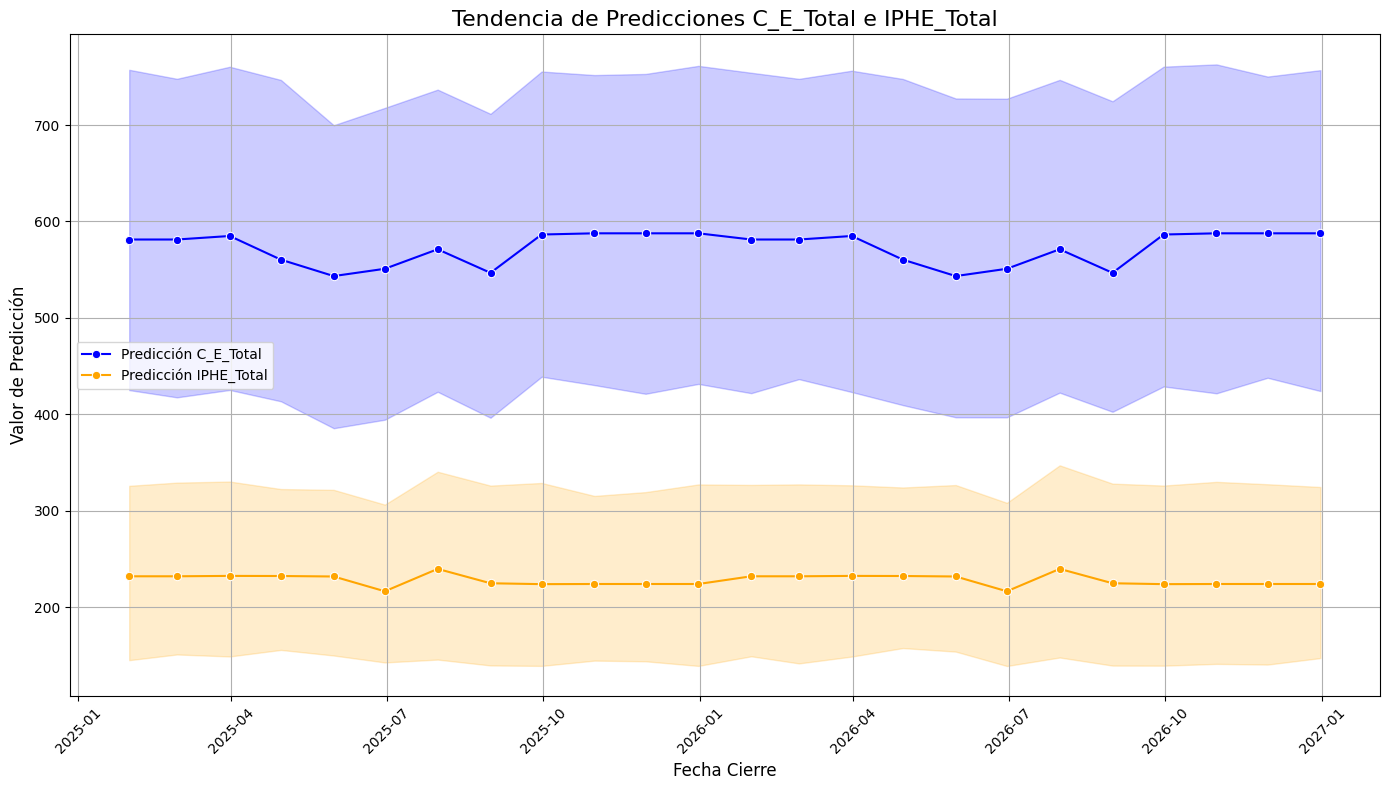

In [78]:
# Asegúrate de que 'Fecha_Cierre' esté en formato datetime
df_predicciones['Fecha_Cierre'] = pd.to_datetime(df_predicciones['Fecha_Cierre'])

# Establecer el tamaño de la figura
plt.figure(figsize=(14, 8))

# Graficar Predicción C_E_Total
sns.lineplot(data=df_predicciones, x='Fecha_Cierre', y='Predicción C_E_Total', label='Predicción C_E_Total', marker='o', color='blue')

# Graficar Predicción IPHE_Total
sns.lineplot(data=df_predicciones, x='Fecha_Cierre', y='Predicción IPHE_Total', label='Predicción IPHE_Total', marker='o', color='orange')

# Añadir título y etiquetas
plt.title('Tendencia de Predicciones C_E_Total e IPHE_Total', fontsize=16)
plt.xlabel('Fecha Cierre', fontsize=12)
plt.ylabel('Valor de Predicción', fontsize=12)

# Añadir leyenda
plt.legend()

# Mostrar la cuadrícula
plt.grid(True)

# Mostrar la gráfica
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [67]:
# Crear un nuevo DataFrame solo con las predicciones relevantes
df_predicciones = X_future[['Fecha_Cierre', 'Escuela, Programa, Extensión', 'Año', 'Mes',
                            'Predicción C_E_Total', 'Predicción IPHE_Total']]

# Ver resultado
print(df_predicciones.head())
df_predicciones.to_excel("predicciones_iphe.xlsx", index=False)

  Fecha_Cierre     Escuela, Programa, Extensión   Año  Mes  \
0   2025-01-01    Escuela de Enseñanza Especial  2025    1   
1   2025-01-01      Escuela Vocacional Especial  2025    1   
2   2025-01-01                Escuela de Sordos  2025    1   
3   2025-01-01  Escuela de Ciegos Hellen Keller  2025    1   
4   2025-01-01              Programa de Autismo  2025    1   

   Predicción C_E_Total  Predicción IPHE_Total  
0           1521.432007              -0.594219  
1            589.627258             870.232666  
2           1097.600098              31.414806  
3            173.279099             105.159233  
4            350.850098             131.818008  


In [65]:
readme_content =  """
📄 README.txt – Análisis y Predicción de Matrícula en el IPHE Panamá (2021–2026)

 Descripción del Proyecto
Este proyecto analiza y predice la matrícula de estudiantes en los diferentes centros y programas del Instituto Panameño de Habilitación Especial (IPHE), con el objetivo de apoyar la toma de decisiones en políticas públicas sobre educación inclusiva. Utiliza datos mensuales publicados por el IPHE entre 2021 y 2023, aplicando modelos de machine learning y análisis de agrupamiento (clustering) para identificar tendencias y proyecciones futuras.

Archivos Necesarios
- Dataset: iphe_estadisticas_2021_2023.xlsx
- Ubicación recomendada: Carpeta del notebook
- Fuente oficial: https://www.datosabiertos.gob.pa

Requisitos Técnicos
Estan instaladas las siguientes librerías de Python:
pip install pandas numpy matplotlib seaborn scikit-learn xgboost

Estructura del Análisis
1. Carga y limpieza de datos
2. Análisis exploratorio de los datos
3. Análisis de Clusters
2. Modelado predictivo
4. Predicciones futuras
5. Visualización

Instrucciones para Ejecutar
1. Abre el archivo AnálisisIPHEestadistica.ipynb en Jupyter Notebook o Google Colab.
2. Asegúrate de que el archivo iphe_estadisticas_2021_2023.xlsx esté disponible.
3. Ejecuta todas las celdas del notebook.
4. Observa las predicciones y análisis generados.

Resultados Esperados
- Predicciones del total de estudiantes atendidos (C_E_Total) por mes.
- Predicciones del total general atendido por el IPHE (IPHE_Total).
- Identificación de patrones y agrupamientos entre programas similares.
- Visualización de tendencias estacionales o crecientes.

Impacto del Proyecto
Este análisis busca influenciar políticas públicas sobre educación inclusiva en Panamá, justificando la necesidad de:
- Mayor infraestructura especializada.
- Contratación de personal capacitado.
- Planificación a largo plazo para el aumento sostenido de estudiantes con necesidades especiales.
"""

with open("README.txt", "w", encoding="utf-8") as file:
    file.write(readme_content)

print("Archivo README.txt generado con éxito.")

Archivo README.txt generado con éxito.
